In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [2]:
df=pd.read_csv('UpdatedStudentsPerformance.csv')

In [3]:
numeric=df.select_dtypes(include=np.number)

In [4]:
numeric.isna().sum()

math score       10
reading score    15
writing score    11
dtype: int64

In [5]:
for i in numeric:
    numeric[i]=numeric[i].replace(np.NaN, numeric[i].mean())

In [6]:
numeric.isna().sum()

math score       0
reading score    0
writing score    0
dtype: int64

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

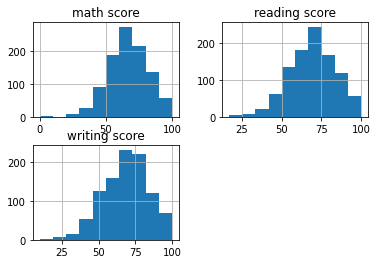

In [7]:
#outlier using zscore
numeric.hist()

<Axes: ylabel='math score'>

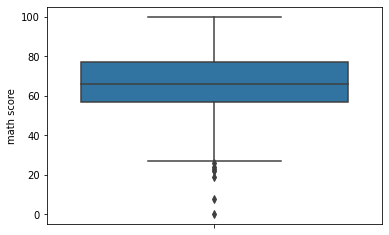

In [8]:
sns.boxplot(y='math score',data=df)

In [9]:
def detect(df):
    outliers=[]
    threshold=2
    mean=np.mean(df['math score'])
    std=np.std(df['math score'])
    for i in df['math score']:
        zs=(i-mean)/std
        if(np.abs(zs) > threshold):
            outliers.append(i)
    return outliers

In [10]:
res=detect(df)

In [11]:
print(res, df.shape)

[97.0, 33.0, 0.0, 30.0, 27.0, 98.0, 99.0, 22.0, 100.0, 97.0, 35.0, 34.0, 99.0, 97.0, 99.0, 28.0, 24.0, 35.0, 27.0, 100.0, 100.0, 26.0, 36.0, 29.0, 97.0, 32.0, 30.0, 29.0, 35.0, 100.0, 100.0, 29.0, 98.0, 35.0, 32.0, 19.0, 23.0, 97.0, 97.0, 32.0, 36.0, 34.0, 100.0, 35.0, 98.0, 100.0, 8.0] (1000, 8)


In [12]:
indexval=df[(df['math score'].isin(res))].index
df.drop(indexval, inplace=True)
df.shape

(953, 8)

<Axes: ylabel='math score'>

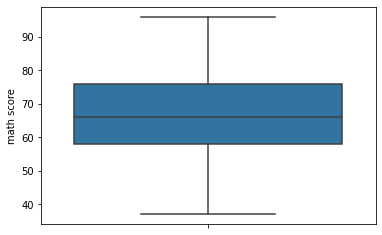

In [13]:
sns.boxplot(y='math score', data=df)

<Axes: >

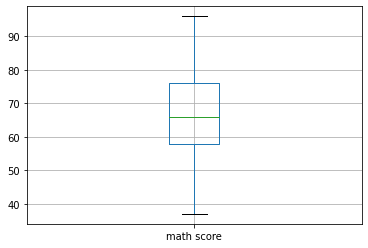

In [14]:
df.boxplot(column='math score')

<Axes: >

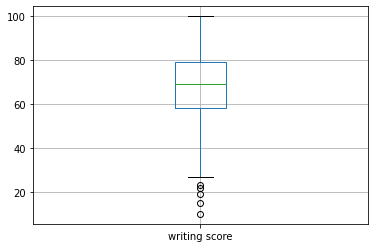

In [15]:
#IQR
numeric.boxplot(column='writing score')

<Axes: >

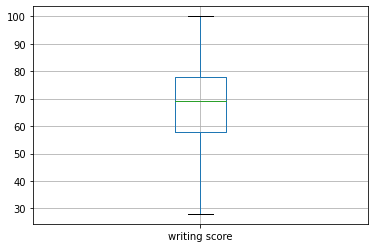

In [16]:
q1=df['writing score'].quantile(0.25)
q3=df['writing score'].quantile(0.75)
IQR=q3-q1
low=q1-1.5*IQR
high=q3+1.5*IQR

df = df[(df['writing score']>=low) &(df['writing score']<=high)]
df.boxplot(column='writing score')

<Axes: >

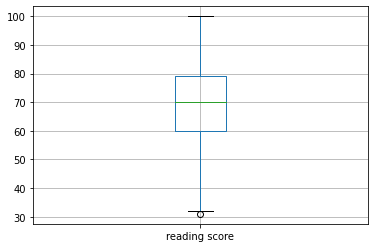

In [17]:
#minmax
df.boxplot(column='reading score')

In [18]:
outliers=[]
def detect(df):
    threshold=0
    mini=np.min(df['reading score'])
    maxi=np.max(df['reading score'])
    IQR=maxi-mini
    
    low=mini+threshold*IQR
    high=maxi-threshold*IQR
    for i in df['reading score']:
        if i<=low or i>high:
            outliers.append(i)
    return outliers

In [19]:
res2=detect(df)

In [20]:
print(res2,df.shape)

[31.0] (942, 8)


In [21]:
indexval=df[(df['reading score'].isin(res2))].index
df.drop(indexval, inplace=True)
df.shape

(941, 8)

<Axes: >

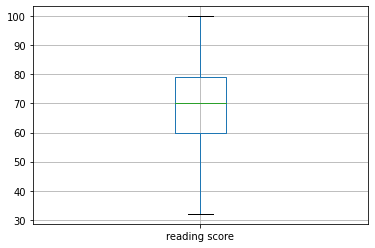

In [22]:
df.boxplot(column='reading score')